In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from math import sqrt
import visualkeras

In [2]:
# Global variables

NUM_OF_TIMESTEPS_INPUT = 48
NUM_OF_TIMESTEPS_OUTPUT = 24
NUM_OF_FEATURES = 9

THRESHOLD = 0.4   # For feature selection

In [3]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import layers, models
import time

tscv = TimeSeriesSplit(n_splits = 4, test_size=24) # For cross-validation

callback = keras.callbacks.EarlyStopping(monitor='loss', patience = 4) #patience parameter to be adjusted

loss = []
val_loss = []
loss_1 = []
val_loss_1 = []
loss_2 = []
val_loss_2 = []

# Input layer
input_layer = layers.Input(shape=(NUM_OF_TIMESTEPS_INPUT, NUM_OF_FEATURES))

# Dense layers for variable 1
lstm1 = layers.LSTM(48, activation='leaky_relu', return_sequences=True)(input_layer)
lstm2 = layers.LSTM(48, activation='leaky_relu', return_sequences=True)(lstm1)
lstm3 = layers.LSTM(24, activation='leaky_relu', return_sequences=False)(lstm2)
output_variable1 = layers.Dense(24, name='output_variable1')(lstm3)

# Dense layers for variable 2
dense4 = layers.LSTM(48, activation='leaky_relu', return_sequences=True)(input_layer)
dense5 = layers.LSTM(48, activation='leaky_relu', return_sequences=True)(dense4)
dense6 = layers.LSTM(24, activation='leaky_relu', return_sequences=False)(dense5)
output_variable2 = layers.Dense(24, name='output_variable2')(dense6)

# Define the model
model = models.Model(inputs=input_layer, outputs=[output_variable1, output_variable2])

model.compile(
    optimizer='adam',
    loss={'output_variable1': 'mean_squared_error', 'output_variable2': 'mean_squared_error'}
) #types of optimizer, loss function to be adjusted

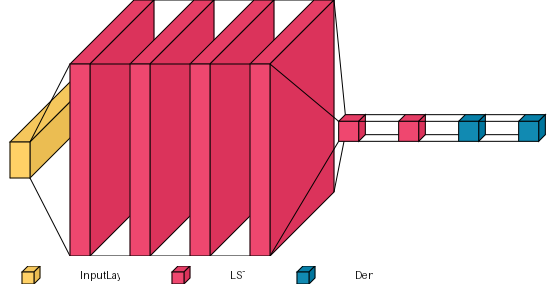

In [7]:
visualkeras.layered_view(model, legend=True, spacing=40)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 9)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 48, 48)               11136     ['input_1[0][0]']             
                                                                                                  
 lstm_3 (LSTM)               (None, 48, 48)               11136     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 48, 48)               18624     ['lstm[0][0]']                
                                                                                              